## **Importing Dataset**

In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshitrustagi","key":"d67c4395e9eef5ed0b5bd2e6ff0b8d4a"}'}

In [8]:
! mkdir ~/.kaggle

In [9]:
!cp kaggle.json ~/.kaggle/

In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d adityajn105/flickr30k

100% 8.15G/8.16G [02:58<00:00, 37.9MB/s]
100% 8.16G/8.16G [02:58<00:00, 49.0MB/s]


In [12]:
! unzip flickr30k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/flickr30k_images/5354911151.jpg  
  inflating: Images/flickr30k_images/535529555.jpg  
  inflating: Images/flickr30k_images/5356236664.jpg  
  inflating: Images/flickr30k_images/5356318668.jpg  
  inflating: Images/flickr30k_images/535830521.jpg  
  inflating: Images/flickr30k_images/5359437945.jpg  
  inflating: Images/flickr30k_images/5361355399.jpg  
  inflating: Images/flickr30k_images/53614287.jpg  
  inflating: Images/flickr30k_images/536147209.jpg  
  inflating: Images/flickr30k_images/5361551308.jpg  
  inflating: Images/flickr30k_images/536156200.jpg  
  inflating: Images/flickr30k_images/5362687336.jpg  
  inflating: Images/flickr30k_images/5363528971.jpg  
  inflating: Images/flickr30k_images/5363903246.jpg  
  inflating: Images/flickr30k_images/5364849864.jpg  
  inflating: Images/flickr30k_images/536495604.jpg  
  inflating: Images/flickr30k_images/5365075444.jpg  
  inflating: Images/flickr30k_images/5

In [13]:
import os,os.path

In [14]:
DIR = 'Images/flickr30k_images'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

31783


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import nltk
from nltk.corpus import stopwords
import string
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

## **Data Collection**

In [ ]:
def readTextfile(path):
  with open(path) as f:
    captions = f.read()
    return captions
 

In [ ]:
captions = readTextfile("captions.txt")
print(type(captions))
captions  = captions.split("\n")
print(len(captions))

<class 'str'>
158917


In [ ]:
captions[-5:]

['998845445.jpg," A young man hanging over the side of a boat , which is in a like with fog rolling over a hill behind it ."',
 '998845445.jpg, A man is leaning off of the side of a blue and white boat as it sits in a body of water .',
 '998845445.jpg," A man riding a small boat in a harbor , with fog and mountains in the background ."',
 '998845445.jpg, A man on a moored blue and white boat with hills and mist in the background .',
 '']

In [ ]:
captions[:5]

['image,caption',
 '1000092795.jpg, Two young guys with shaggy hair look at their hands while hanging out in the yard .',
 '1000092795.jpg," Two young , White males are outside near many bushes ."',
 '1000092795.jpg, Two men in green shirts are standing in a yard .',
 '1000092795.jpg, A man in a blue shirt standing in a garden .']

In [ ]:
len(captions[1:-1])

158915

In [ ]:
158915/5

31783.0

In [ ]:
# Removing the first and last lines of captions file
captions = captions[1:-1]

## **Splitting the data**

In [ ]:
images[:5]

['3158929958.jpg',
 '2303356248.jpg',
 '4555514125.jpg',
 '640053014.jpg',
 '5121831412.jpg']

In [ ]:
len(images)

31783

In [ ]:
x = len(train_images)
y = len(test_images)
print(x,y,x+y)

26475 5308 31783


In [ ]:
# val_images , test_images = train_test_split(test_images,test_size=0.5,random_state=42)

In [ ]:
# a = len(val_images)
# b = len(test_images)
# print(x,a,b,x+a+b)

26475 2654 2654 31783


In [ ]:

captions[:5]

['1000092795.jpg, Two young guys with shaggy hair look at their hands while hanging out in the yard .',
 '1000092795.jpg," Two young , White males are outside near many bushes ."',
 '1000092795.jpg, Two men in green shirts are standing in a yard .',
 '1000092795.jpg, A man in a blue shirt standing in a garden .',
 '1000092795.jpg, Two friends enjoy time spent together .']

In [ ]:
# all_captions = list(captions)

# train_captions = []
# # val_captions = []
# test_captions = []

# for caption in all_captions:
#   desc = caption.split(",")
#   id = desc[0]
#   # print(id)
#   if str(id) in train_images:
#     train_captions.append(caption)

#   # elif id in val_images:
#     # val_captions.append(caption)

#   else:
#     test_captions.append(caption)



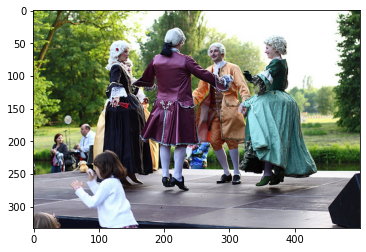

In [ ]:
train_captions[0]

'10002456.jpg, Several men in hard hats are operating a giant pulley system .'

In [ ]:
len(train_images)

26475

In [ ]:
# train_descriptions = Descriptions(train_captions)

In [ ]:
len(test_images)

5308

In [ ]:
# train_descriptions["10002456"]

['startseq Several men in hard hats are operating a giant pulley system . endseq',
 'startseq Workers look down from up above on a piece of equipment . endseq',
 'startseq Two men working on a machine wearing hard hats . endseq',
 'startseq Four men on top of a tall structure . endseq',
 'startseq Three men on a large rig . endseq']

In [ ]:
test_images[2654]

'1000092795.jpg, Two young guys with shaggy hair look at their hands while hanging out in the yard .'

In [ ]:
test_images = test_images[:2654]

In [ ]:
a = len(val_images)
b = len(test_images)
c = len(train_images)
d = len(val_captions)/5
e = len(test_captions)/5
f = len(train_captions)/5
print(a,b,c,d,e,f)

2654 2654 26475 2654.0 2654.0 26475.0


## **Text Cleaning**

In [ ]:
# Here we will not remove the stopwords and won't stem the words
# We will convert all words to lowercase , remove alphanumeric 
# This will help to reduce the vocab size which helps in reducing overfitting and computational time

def cleanText(sentence):

  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()
    
  # sentence  = [s for s in sentence if len(s)>1]
  sentence = " ".join(sentence)
  
  return sentence

In [ ]:
for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i] = cleanText(caption_list[i])

descriptions["1000092795"]

['two young guys with shaggy hair look at their hands while hanging out in the yard',
 'two young white males are outside near many bushes',
 'two men in green shirts are standing in a yard',
 'a man in a blue shirt standing in a garden',
 'two friends enjoy time spent together']

In [ ]:
with open("/content/drive/MyDrive/Image Captioning/descriptions_1.txt","w") as f:
    f.write(str(descriptions))

In [2]:
descriptions = None
with open("/content/drive/MyDrive/Image Captioning/descriptions_1.txt","r") as f:
  descriptions = f.read()

json_acceptable_string = descriptions.replace("'","\"")
descriptions = json.loads(json_acceptable_string)

In [ ]:
type(descriptions)

dict

In [ ]:
descriptions['1000344755']

['someone in a blue shirt and hat is standing on stair and leaning against a window',
 'a man in a blue shirt is standing on a ladder cleaning a window',
 'a man on a ladder cleans the window of a tall building',
 'man in blue shirt and jeans on ladder cleaning windows',
 'a man on a ladder cleans a window']

## **Preparing Train and Test data**

In [15]:
from sklearn.model_selection import train_test_split
import os,os.path

p = "Images/flickr30k_images"
images = [name for name in os.listdir(p)]


train_images , test_images = train_test_split(images,test_size=0.167,random_state=5)


In [ ]:
def showImg(path):

  img = plt.imread(path)
  plt.imshow(img)
  plt.show()

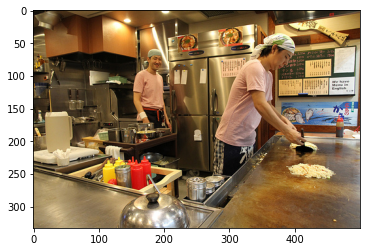

In [ ]:
showImg("Images/flickr30k_images/"+str(train_images[0]))

In [ ]:
descriptions[str(train_images[0].split(".")[0])]

['two men in pink short sleeved shirts and white head wraps are in a commercial kitchen one working and the other smiling as he looks on',
 'two chefs in an asian restaurant one cooking on a hibachi type girl the other standing by the refrigerators smiling for the camera',
 'two men wearing pink shirts and headscarves in an industrial kitchen prepare noodles on a griddle',
 'one asian cook watches another cook on a griddle in a commercial kitchen',
 'a cook prepares a meal in the kitchen']

In [4]:
def Descriptions(image_data):
  custom_descriptions = {}

  for image_path in image_data:
    img_id = image_path.split(".")[0]
    custom_descriptions[img_id] = []

    for caption in descriptions[img_id]:
      custom_descriptions[img_id].append("startseq "+caption+ " endseq")

  return custom_descriptions

In [16]:
train_descriptions = Descriptions(train_images)

In [ ]:
train_descriptions[str(train_images[0].split(".")[0])]

['startseq two men in pink short sleeved shirts and white head wraps are in a commercial kitchen one working and the other smiling as he looks on endseq',
 'startseq two chefs in an asian restaurant one cooking on a hibachi type girl the other standing by the refrigerators smiling for the camera endseq',
 'startseq two men wearing pink shirts and headscarves in an industrial kitchen prepare noodles on a griddle endseq',
 'startseq one asian cook watches another cook on a griddle in a commercial kitchen endseq',
 'startseq a cook prepares a meal in the kitchen endseq']

## **Vocabulary**

In [17]:
total_words = []

for key in descriptions.keys():
  for caption in descriptions[key]:
    for word in caption.split():
      total_words.append(word)

len(total_words)

1955240

In [18]:
import collections

counter = collections.Counter(total_words)
freq_cnt = dict(counter)
len(freq_cnt.items())

18079

In [19]:
sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])
threshold = 20
sorted_freq_cnt = [x for x in sorted_freq_cnt if x[1]>threshold]
len(sorted_freq_cnt)

3596

In [20]:
vocab = set()

for key in descriptions.keys():
  for caption in descriptions[key]:
    vocab.update(caption.split())

len(vocab)

18079

In [21]:
total_words = [x[0] for x in sorted_freq_cnt]
print(len(total_words))

3596


## **Transfer Learning**

### Image Feature Extraction

In [ ]:
model = ResNet50(weights='imagenet',input_shape=(224,224,3))
model.summary()

In [ ]:
model_new = Model(model.input,model.layers[-2].output)

In [ ]:
def preprocess_img(img):
  img = image.load_img(img,target_size=(224,224))
  img = image.img_to_array(img)
  # We have to change the dimensions of the image array as Resnet model accepts a 4-D tensor ( first dimension is the batch size)
  # We can also use np.reshape((1,224,224,3)) instead of expand_dims
  img = np.expand_dims(img,axis=0)
  # Preprocessing by inbuilt function of resnet50 model
  # The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
  img = preprocess_input(img)

  return img

In [ ]:
x = preprocess_img("Images/flickr30k_images/"+str(train_images[0]))
print(x)
plt.imshow(x[0])
plt.show()
# Here, matplotlib has taken values <0 as 0 and >255 as 255 so thats why the image is distorted

In [ ]:
# Function to encode an image
def encode_img(img):
  # First preprocess the image
  preprocessed_image = preprocess_img(img)
  # Pass the preprocessed image through the resnet model to get a feature vector
  feature_vector = model_new.predict(preprocessed_image)
  feature_vector = feature_vector.reshape((-1,)) # ==> shape = (2048,)

  return feature_vector

In [ ]:
encoding = encode_img("Images/flickr30k_images/"+str(train_images[0]))
print(encoding.shape,encoding)

(2048,) [0.06399975 1.085593   0.6757685  ... 0.6915917  0.5410563  1.4069418 ]


In [ ]:
# This dict stores (image-id -- encoding )
encoding_train = {}

start = time()

for index,img_id in enumerate(train_images):
  img_path = "Images/flickr30k_images/"+str(img_id)
  encoding_train[img_id] = encode_img(img_path)

  if index%100:
    print(f"Encoding in time step {index%100}")

end = time()

print(f"Total time taken : {end-start}")

In [ ]:
with open("/content/drive/MyDrive/Image Captioning/Encodings/encoded_train_features.pkl","wb") as f:
  pickle.dump(encoding_train,f)

In [ ]:
# This dict stores (image-id -- encoding )
encoding_test = {}

start = time()

for index,img_id in enumerate(test_images):
  img_path = "Images/flickr30k_images/"+str(img_id)
  encoding_test[img_id] = encode_img(img_path)

  if index%100:
    print(f"Encoding in time step {index}")

end = time()

print(f"Total time taken : {end-start}")

In [ ]:
with open("/content/drive/MyDrive/Image Captioning/Encodings/encoded_test_features.pkl","wb") as f:
  pickle.dump(encoding_test,f)

### Data Pre-processing for captions ( Converting captions to numbers )

In [22]:
# Reserve index 0 for words which we have neglected (whose frequency is less than threshold)

idx_to_word = {}
word_to_idx = {}

for index,word in enumerate(total_words):
  idx_to_word[index+1] = word
  word_to_idx[word] = index+1

print(len(idx_to_word))
idx_to_word[3598] = "endseq"
word_to_idx["endseq"] = 3598

idx_to_word[3597] = "startseq"
word_to_idx["startseq"] = 3597

vocab_size = len(idx_to_word) + 1
print(vocab_size)


3596
3599


In [23]:
max_len = 0

for key in train_descriptions.keys():
  for caption in train_descriptions[key]:
    max_len = max(max_len,len(caption.split()))

print(max_len)
# This will be the size of each RNN cell

80


In [24]:
train_encodings = open("/content/drive/MyDrive/Image Captioning/Encodings/encoded_train_features.pkl","rb")

In [25]:
encoding_train = pickle.load(train_encodings)

In [26]:
train_encodings.close()

In [27]:
type(encoding_train)

dict

### Data generator


In [30]:
def data_generator(encoding_train,train_descriptions,word_to_idx,batch_size,max_len):
  # X1 - encoding of image
  # X2 - partial caption
  # y - target word
  X1,X2,y = [],[],[]
  n = 0

  while True:
    for key,captions in train_descriptions.items():
      n += 1

      photo = encoding_train[key]
      for caption in captions:

        seq = [word_to_idx[word] for word in caption.split() if word in word_to_idx]

        for i in range(1,len(seq)):
          xi = seq[0:i]
          yi = seq[i]
          # 0 denotes padded word
          xi = pad_sequences([xi],maxlen=max_len,padding='post',value=0)
          # Converting the words into one-hot vectors
          yi = to_categorical(yi,num_classes=vocab_size,dtype='float32')

          X1.append(photo)
          X2.append(xi)
          y.append(yi)

        if n==batch_size:
          yield [[np.array(X1),np.array(X2)],np.array(y)]
          X1,X2,y = [],[],[]
          n = 0



### Word embeddings

In [35]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-10-01 09:23:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-10-01 09:23:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-10-01 09:23:22--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [36]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [37]:
f = open("glove.6B.100d.txt",encoding='utf-8')

In [38]:
embedding_index = {}

for line in f:
  values = line.split()
  word = values[0]
  embedding = np.array(values[1:],dtype='float32')
  embedding_index[word] = embedding

In [39]:
f.close()

In [40]:
embedding_index['apple']

array([-0.5985   , -0.46321  ,  0.13001  , -0.019576 ,  0.4603   ,
       -0.3018   ,  0.8977   , -0.65634  ,  0.66858  , -0.49164  ,
        0.037557 , -0.050889 ,  0.6451   , -0.53882  , -0.3765   ,
       -0.04312  ,  0.51384  ,  0.17783  ,  0.28596  ,  0.92063  ,
       -0.49349  , -0.48583  ,  0.61321  ,  0.78211  ,  0.19254  ,
        0.91228  , -0.055596 , -0.12512  , -0.65688  ,  0.068557 ,
        0.55629  ,  1.611    , -0.0073642, -0.48879  ,  0.45493  ,
        0.96105  , -0.063369 ,  0.17432  ,  0.9814   , -1.3125   ,
       -0.15801  , -0.54301  , -0.13888  , -0.26146  , -0.3691   ,
        0.26844  , -0.24375  , -0.19484  ,  0.62583  , -0.7377   ,
        0.38351  , -0.75004  , -0.39053  ,  0.091498 , -0.36591  ,
       -1.4715   , -0.45228  ,  0.2256   ,  1.1412   , -0.38526  ,
       -0.06716  ,  0.57288  , -0.39191  ,  0.31302  , -0.29235  ,
       -0.96157  ,  0.15154  , -0.21659  ,  0.25103  ,  0.096967 ,
        0.2843   ,  1.4296   , -0.50565  , -0.51374  , -0.4721

In [41]:
with open("/content/drive/MyDrive/Image Captioning/word_embeddings.pkl","wb") as x:
  pickle.dump(embedding_index,x)

In [44]:
def get_embedding_matrix():
  embedding_dim = 100
  matrix = np.zeros((vocab_size,embedding_dim))

  for word,index in word_to_idx.items():
    embedding_vector = embedding_index.get(word)

    if embedding_vector is not None:
      matrix[index] = embedding_vector

  return matrix

In [45]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(3599, 100)

## *Model Architecture*